# **Problem Statement**
The goal of **Engage2Value: From Clicks to Conversions** competition is to predict a customer’s purchase value based on their multi-session behavior across digital touchpoints. The dataset captures anonymized user interactions such as browser types, traffic sources, device details, and geographical indicators. By modeling these patterns, participants will estimate the purchase potential of each user, helping optimize marketing and engagement strategies.

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

In [ ]:
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

pd.set_option('display.max_columns', 55)

# **Exploratory Data Analysis**

In [ ]:
train_df.shape, test_df.shape

((116023, 52), (29006, 51))

In [ ]:
train_df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

In [ ]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,os,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.continent,locationCountry,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,socialEngagementType,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,11,NaN,10.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/a/google.com/forum/,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,domain1,not available in demo dataset,California,Northern America,Not Socially Engaged,NaN,9,1.0,9.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,Philadelphia,Americas,United States,Philadelphia PA,domain2,not available in demo dataset,Pennsylvania,Northern America,Not Socially Engaged,NaN,2,1.0,2.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,3,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/document/d/1GSpeJSCBhxRNya7kiUbBKO3rR20jBBBF3...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo da

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

## Statistical Analysis

In [ ]:
train_df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


**Key Observations:**
* **purchaseValue** column clearly shows **right skewness** as mean is much higher when even compared to 75th percentile. This will be proved using histogram.
* **totals.visits, locationZone, totals.bounces, new_visits** columns show **zero standard deviation** suggesting that these columns are constant or nearly constant. These will be visualized using box-plots.

In [ ]:
train_df.describe(include=['object'])

,trafficSource.isTrueDirect,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,device.operatingSystemVersion,device.flashVersion,geoNetwork.region,trafficSource,geoNetwork.networkLocation,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,geoNetwork.metro,device.mobileDeviceModel,trafficSource.referralPath,device.language,deviceType,userChannel,device.browserVersion,device.screenColors,geoNetwork.continent
count,42890,116023,116023,2963,44162,116023,116023,4281,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,4281,116023,116023,116023,4281,116023,116023,116023,116023,42714,116023,116023,116023,116023,116023,116023
unique,1,34,1,53,566,1,5,3,1,1,28,1,3,1,1,388,161,1,18,23,7,1,1,193,1,2,1,695,104,1,941,1,3,8,1,1,6
top,True,Chrome,not available in demo dataset,Google Merchandise Store,(not provided),medium,Region_2,Top,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain1,not available in demo dataset,not available in demo dataset,not available in demo dataset,google,not available in demo dataset,Windows,Northern America,organic,False,not available in demo dataset,United States,not available in demo dataset,Google Search,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,/,not available in demo dataset,desktop,Organic Search,not available in demo dataset,not available in demo dataset,Americas
freq,42890,84508,116023,1410,39066,116023,23294,2721,116023,116023,110280,116023,38795,116023,116023,60138,44332,116023,39135,63596,40654,4281,116023,60369,116023,2784,116023,60138,60138,116023,17970,116023,86480,46925,116023,116023,69856


**Key Observations:**
* **trafficSource.isTrueDirect, device.screenResolution, screenSize, device.mobileDeviceBranding, device.mobileDeviceMarketingName, device.operatingSystemVersion, device.flashVersion, geoNetwork.networkLocation, trafficSource.adwordsClickInfo.isVideoAd, browserMajor, device.browserSize, socialEngagementType, device.mobileInputSelector, device.mobileDeviceModel, device.language, device.browserVersion, device.screenColors** columns have only one unique value.
* **trafficSource.adContent, trafficSource.adwordsClickInfo.slot, trafficSource.adwordsClickInfo.isVideoAd, trafficSource.adwordsClickInfo.adNetworkType** columns have very low frequencies (Under 5,000 observations).

In [ ]:
# Number of unique values in each column

train_df.nunique().sort_values(ascending=False)

sessionStart                                    107388
sessionId                                       107379
userId                                          100499
purchaseValue                                     6766
trafficSource.referralPath                         941
geoNetwork.city                                    695
date                                               638
trafficSource.keyword                              566
geoNetwork.region                                  388
sessionNumber                                      230
totalHits                                          225
locationCountry                                    193
pageViews                                          175
trafficSource                                      161
geoNetwork.metro                                   104
trafficSource.adContent                             53
browser                                             34
trafficSource.campaign                              28
geoNetwork

**Key Observations:**
* **sessionStart, sessionId, userId** columns have high cardinalities.
* There are **21 columns** with only 1 unique value in them.

In [ ]:
#Percentage of all missing data in columns

missing_pct=(train_df.isna().sum()/train_df.shape[0])*100
missing_pct[missing_pct>0].sort_values(ascending=False)

trafficSource.adContent                         97.446196
trafficSource.adwordsClickInfo.slot             96.310214
trafficSource.adwordsClickInfo.isVideoAd        96.310214
trafficSource.adwordsClickInfo.adNetworkType    96.310214
trafficSource.adwordsClickInfo.page             96.310214
trafficSource.referralPath                      63.184886
trafficSource.isTrueDirect                      63.033192
trafficSource.keyword                           61.936857
totals.bounces                                  59.363230
new_visits                                      30.601691
pageViews                                        0.006895
dtype: float64

## Data Visualization

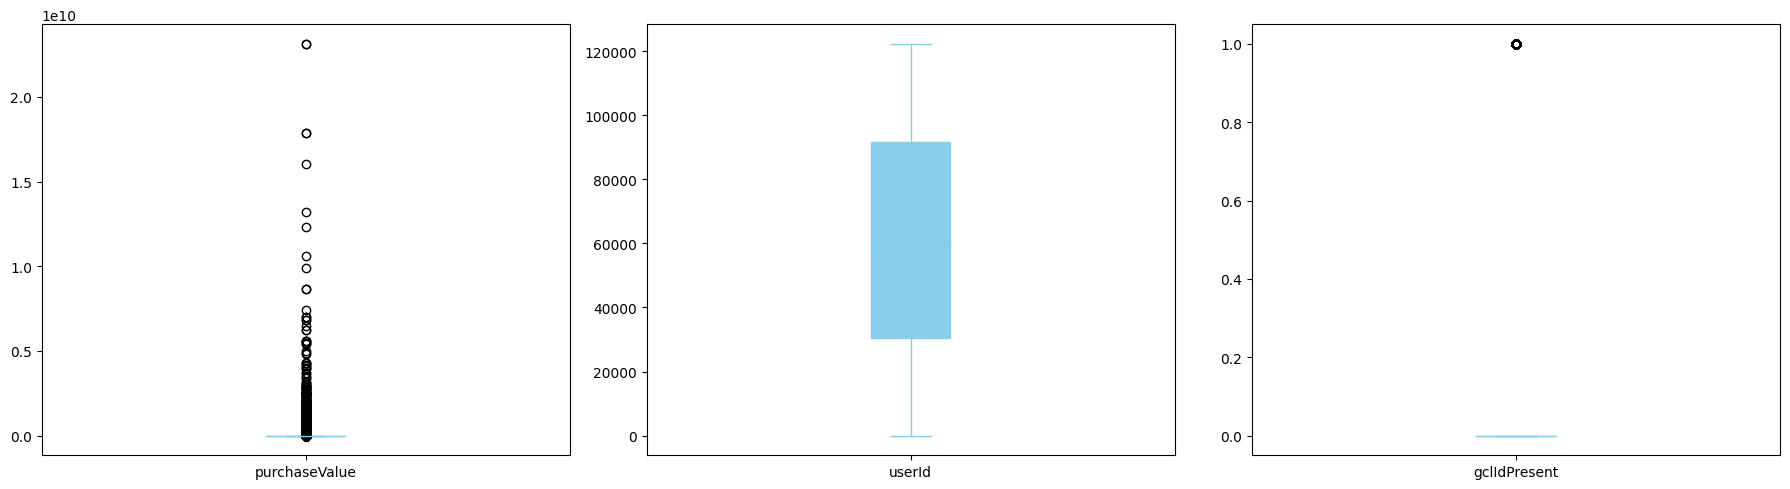

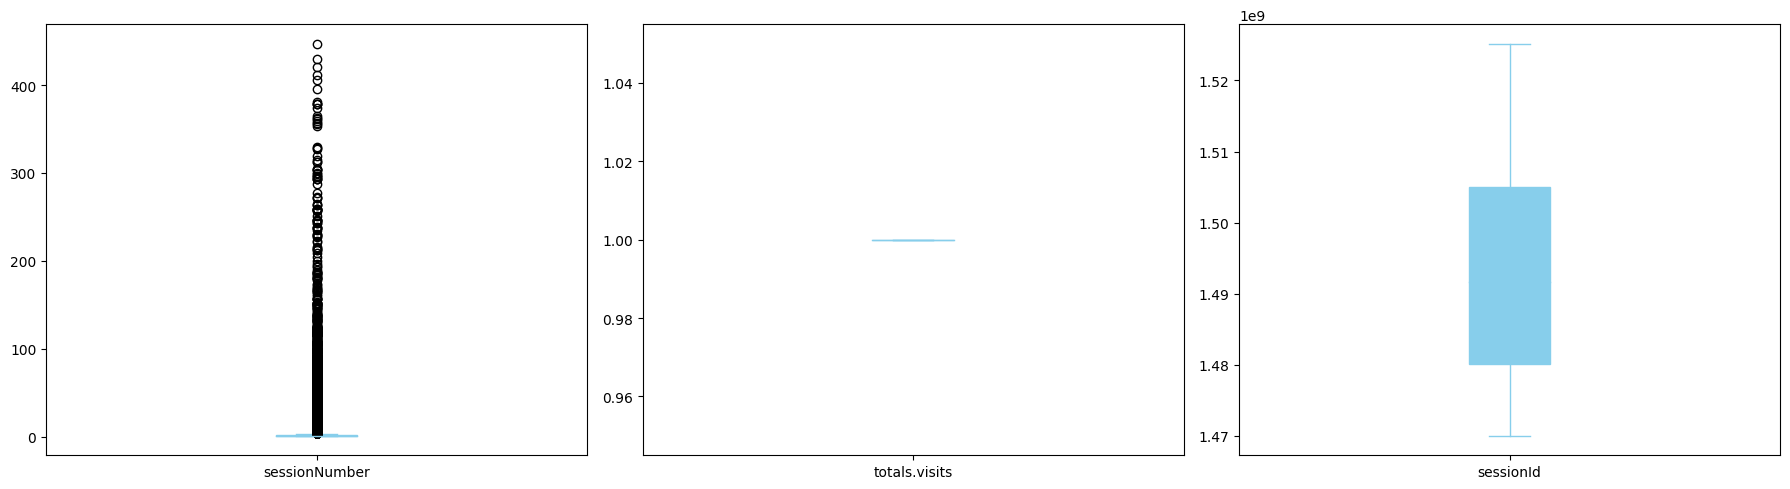

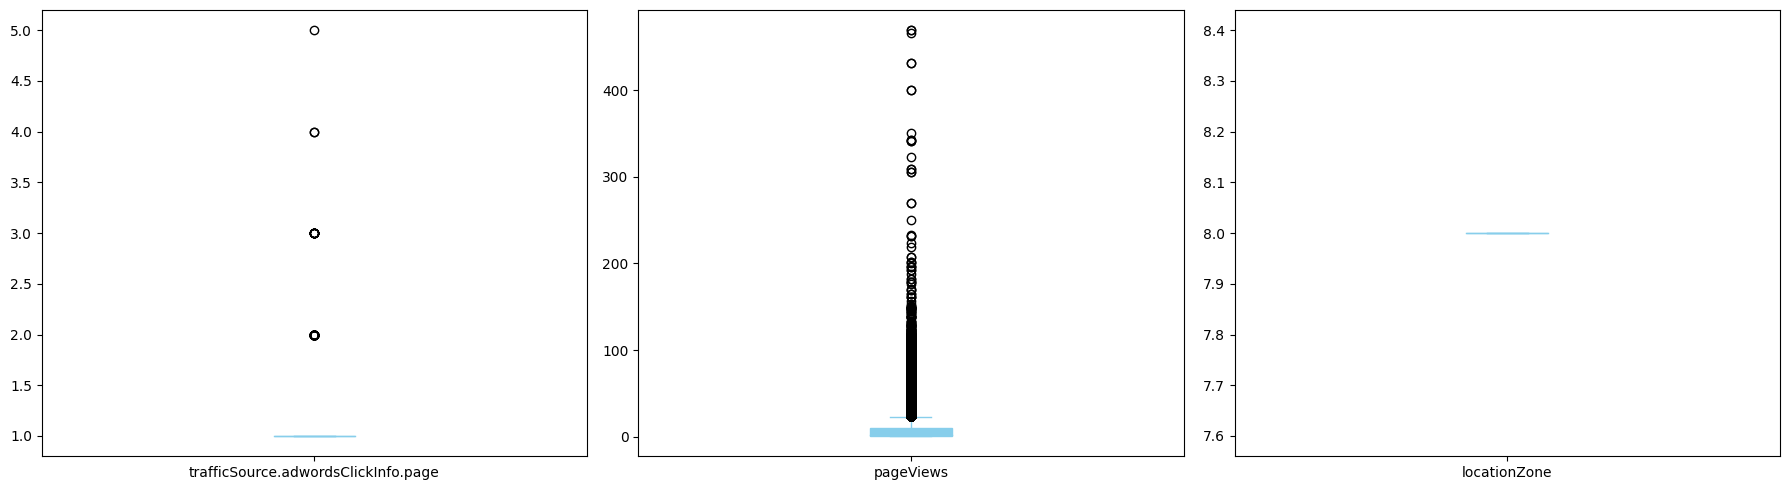

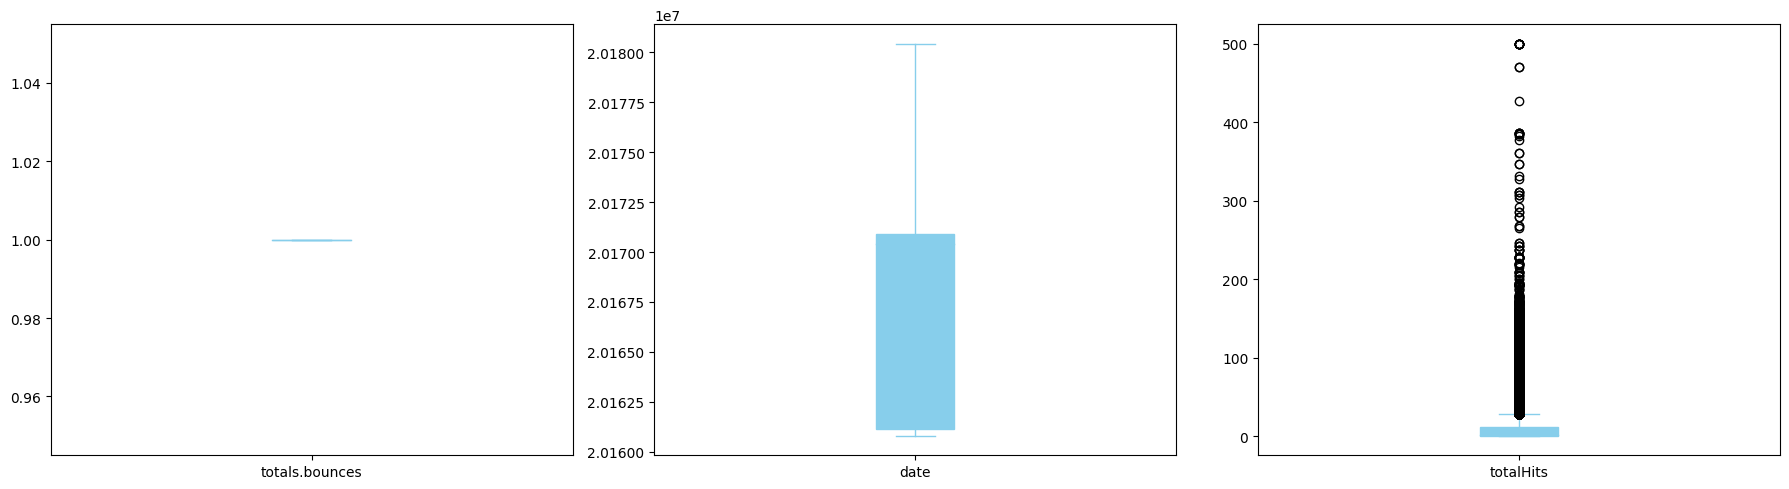

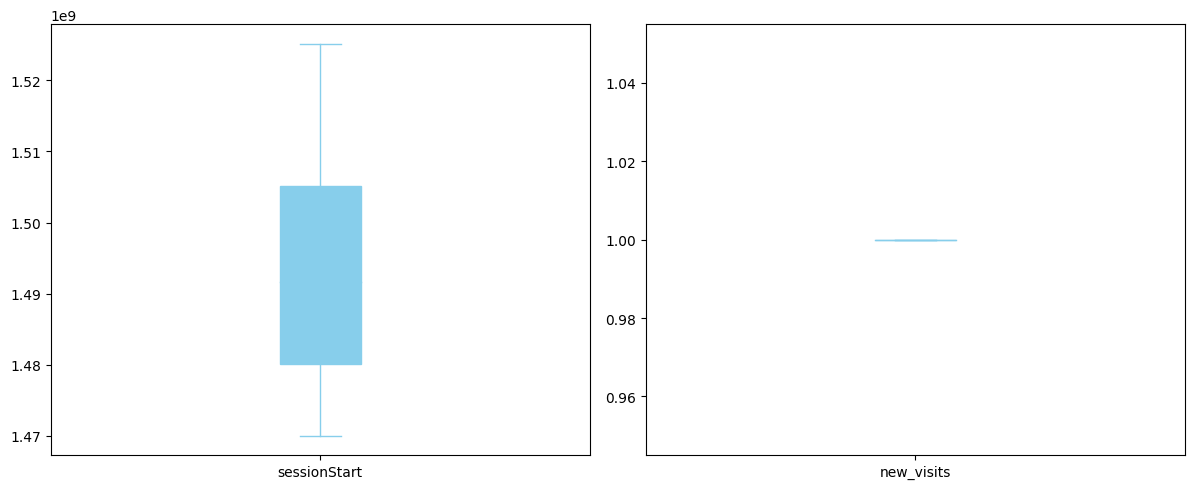

In [ ]:
# Box-plots of numerical features

numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
step = 3
for i in range(0, len(numerical_cols), step):
    train_df[numerical_cols[i:i+step]].plot(
        kind='box',
        subplots=True,
        layout=(1, step),
        figsize=(6*step, 5),
        color='skyblue',
        patch_artist=True
    )
    plt.tight_layout()
    plt.show()

**Key Observations:**
* Features like **totals.visits, locationZone, totals.bounces, new_visits** have constant values.
* **gclIdPresent** is a binary column, but 0 class is highly dominated.
* **date** and **sessionStart** columns need to be converted into dateTime format using pandas.
* **purchaseValue** column has few large outliers.

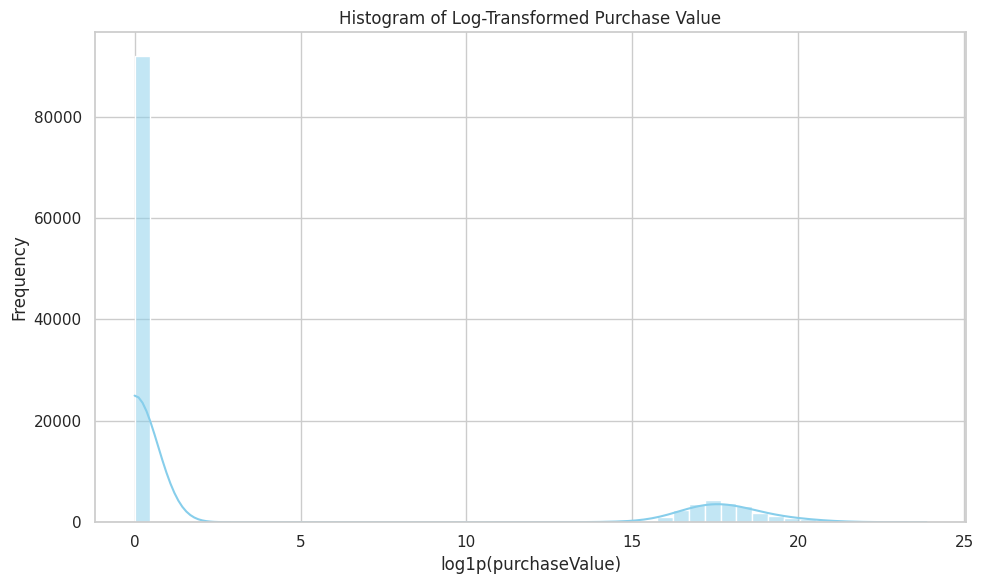

In [ ]:
# Log transformed histogram of target column (purchaseValue)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train_df['purchaseValue']), bins=50, color='skyblue', kde=True)
plt.title("Histogram of Log-Transformed Purchase Value")
plt.xlabel("log1p(purchaseValue)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Key Observation:**
* The histogram above clearly shows that the target column is **highly right skewed**, i.e. many users have not made any purchase.

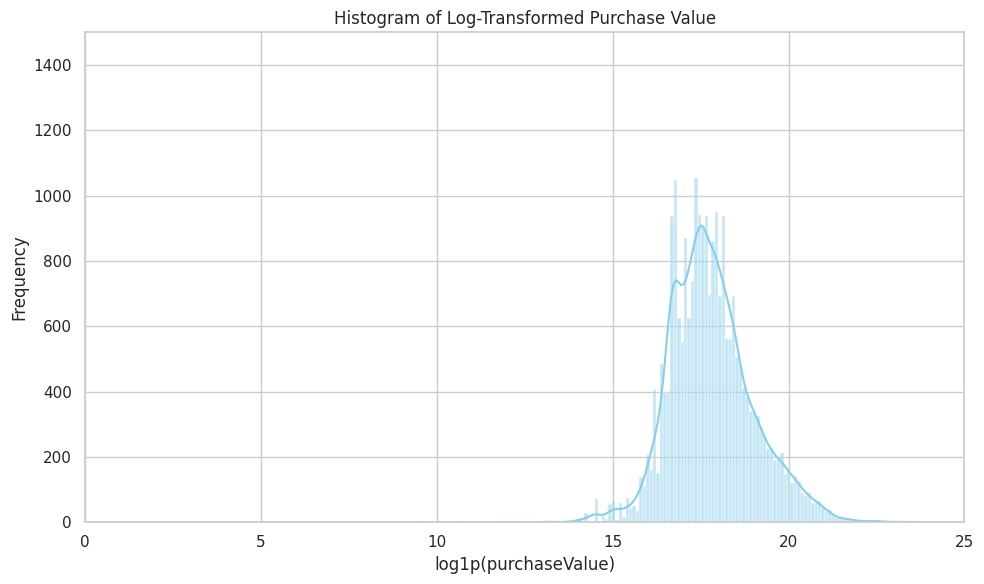

In [ ]:
# Log transformed histogram of purchaseValue where purchaseValue>0

purchase=train_df[train_df['purchaseValue']>0]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(purchase['purchaseValue']), bins=150, kde=True, color='skyblue')
plt.xlim(0, 25)
plt.ylim(0, 1500)
plt.title("Histogram of Log-Transformed Purchase Value")
plt.xlabel("log1p(purchaseValue)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Key Observation:**
* This Histogram shows distribution of target column for those people who made purchases. **This graph looks much closer to a normal distribution.**

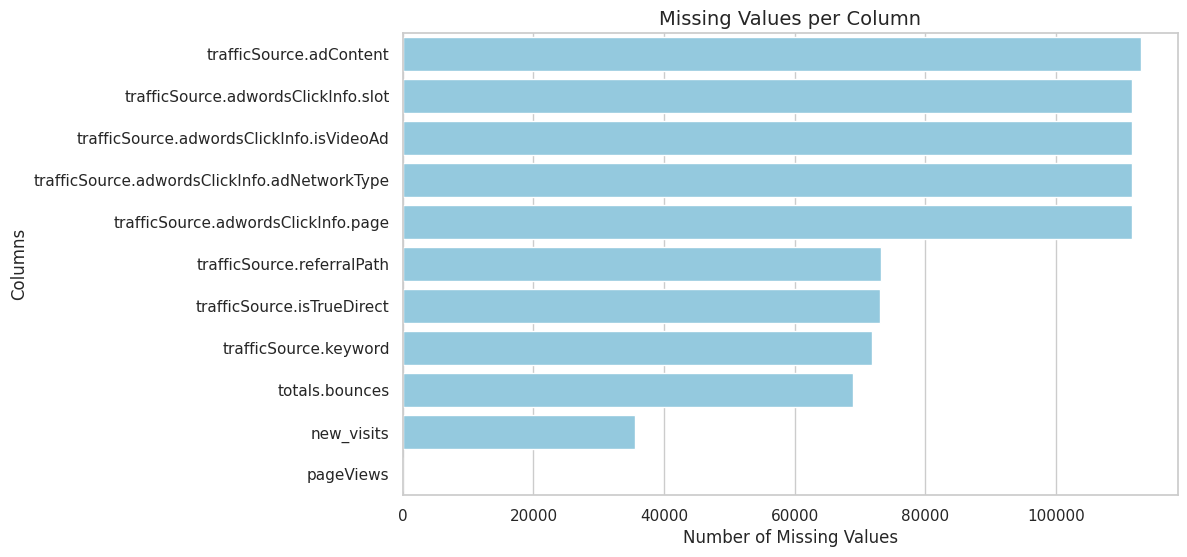

In [ ]:
# Bar-plot of number of missing values in columns

missing_counts = train_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts = missing_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.values, y=missing_counts.index, color='skyblue')
plt.title('Missing Values per Column', fontsize=14)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

**Key Observation:**
* This barplot clearly shows the **top 5 columns have over 100,000 missing observations**.

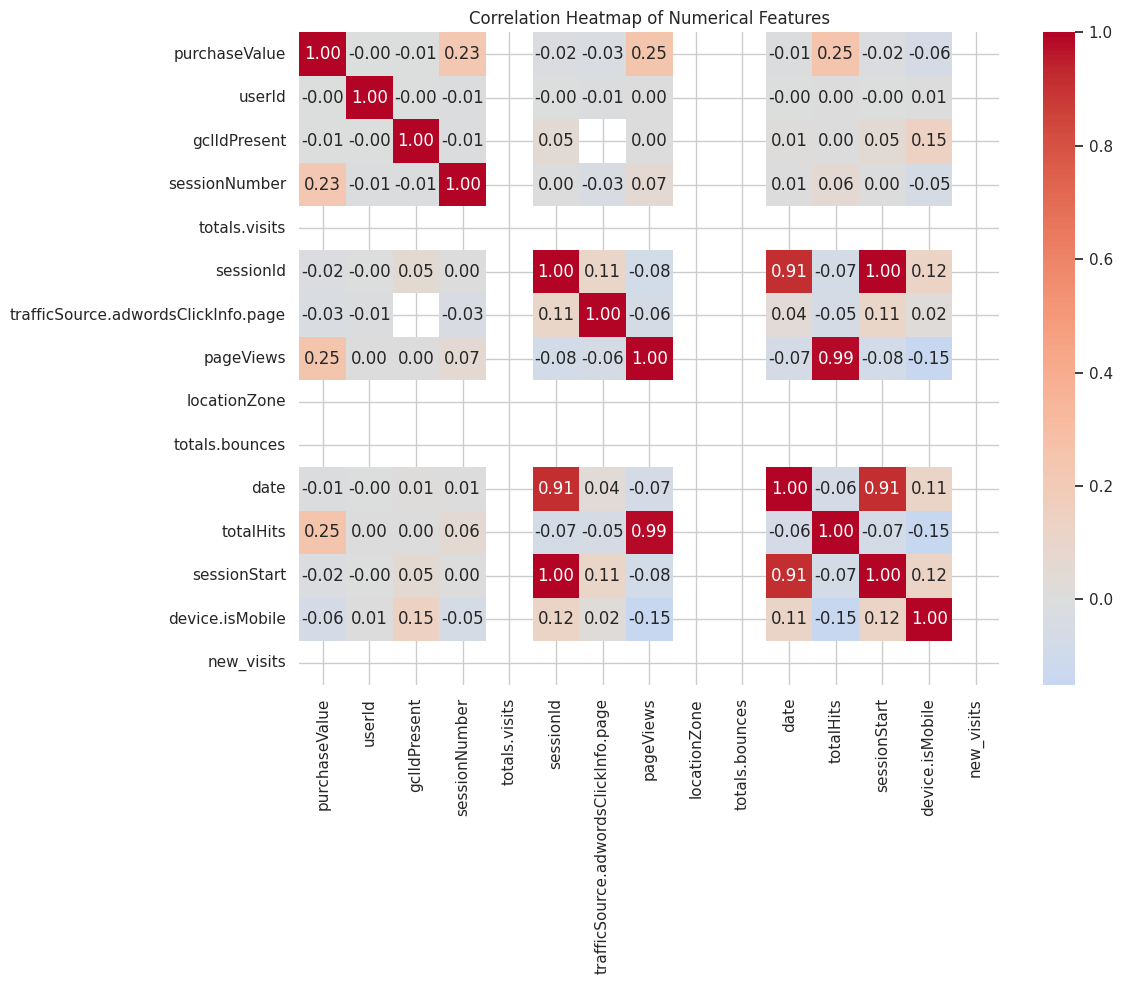

In [ ]:
# Correlation heatmap of all numerical features with eachother

corr_matrix=train_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

**Key Observations:**
* **sessionNumber, pageViews, totalHits** columns could be useful predictors for target column.
* **sessionId, trafficSource.adwordsClickInfo.page, sessionStart, date, device.isMobile** columns have slight weak correlation with **purchaseValue** suggesting that these are weak predictors on their own, but can be useful when interacted with other features or extracting new features from these columns.
* **`pageViews Vs totalHits`, `totalHits Vs sessionStart`, `date Vs sessionStart`, `sessionId Vs date`** are highly correlated to eachother, .i.e. they might not add much information for tree based models like XGBoost and LightGBM models.

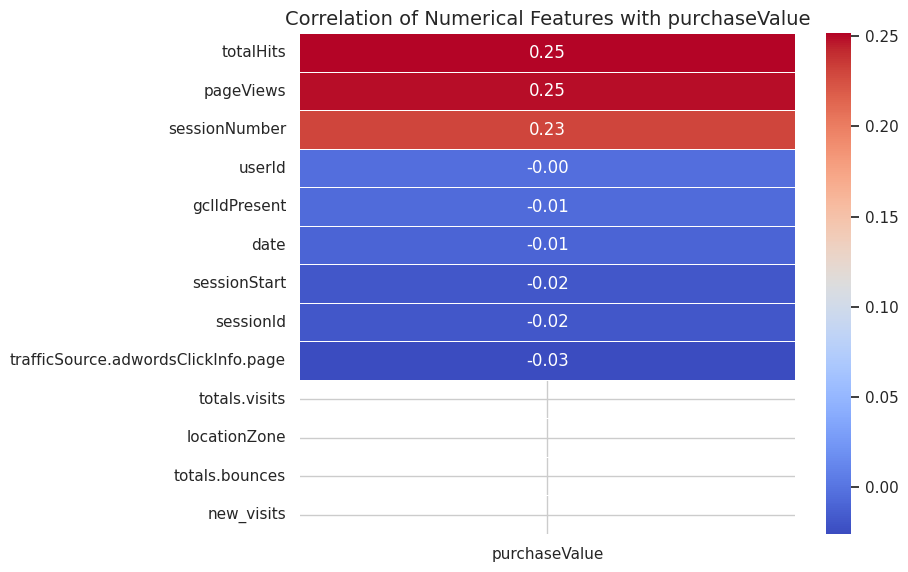

In [ ]:
# correlation heatmap of numerical features with purchaseValue

target='purchaseValue'
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
correlations = train_df[numerical_cols].corr()[target].drop(target)
sorted_corr = correlations.sort_values(ascending=False)

plt.figure(figsize=(8, len(sorted_corr) * 0.5))  # height adjusts to number of features
sns.heatmap(sorted_corr.to_frame(),
            annot=True, cmap='coolwarm',
            cbar=True, linewidths=0.5,
            fmt=".2f")

plt.title(f'Correlation of Numerical Features with {target}', fontsize=14)
plt.show()

**Key Observations:**
* **totalHits, pageViews, sessionNumber** columns have positive correlation with target column, suggesting that these are useful features.
* Although **userId, gclIdPresent, date, sessionStart, sessionId, and trafficSource.adwordsClickInfo.page** columns have weak correlation, these features could be useful for feture extraction or when they are paired with eachother.
* **totals.visits, locationZone, totals.bounces, new_visits** columns have no correlation at all, suggesting that these columns could have  all constant or missing values.

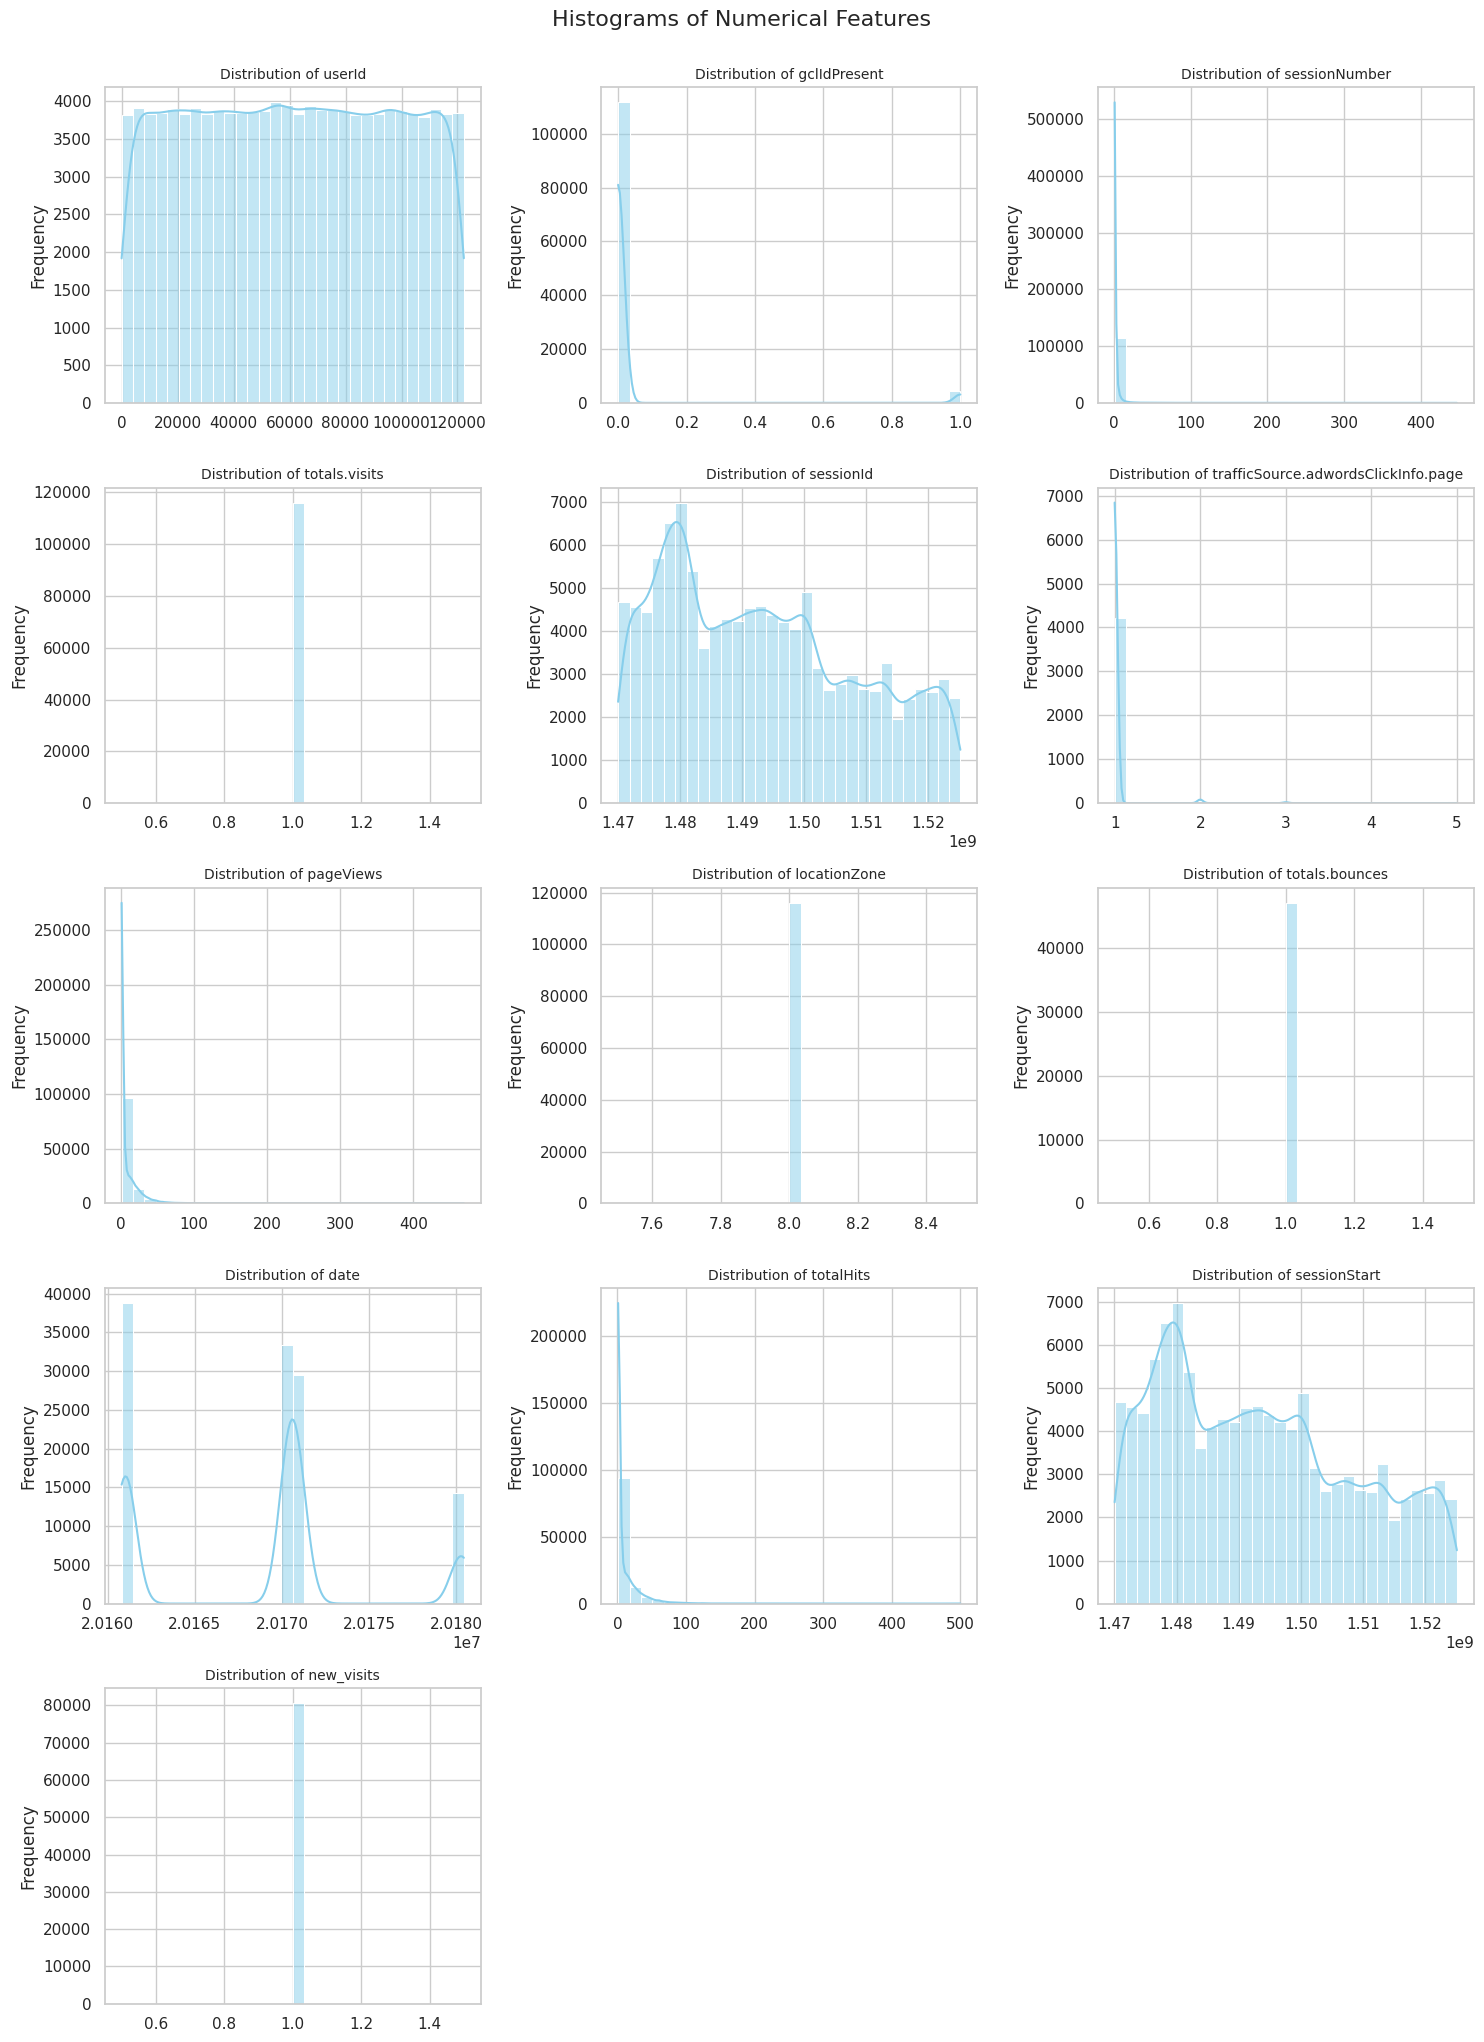

In [ ]:
# Histograms of numerical features

def plot_numerical_histograms(df, bins=30, grid_cols=3):

    cols = df.select_dtypes(include=['int64', 'float64']).columns
    cols=cols.drop(['purchaseValue'])

    total = len(cols)
    grid_rows = math.ceil(total / grid_cols)

    # Create subplots grid
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))
    axes = axes.flatten()

    # Plot each histogram
    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), bins=bins, kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
    plt.show()

plot_numerical_histograms(train_df)

**Key Observations**:
* **pageViews, totalHits, sessionNumber** columns are right-skewed, meaning most users have low values.
* **totals.visits, totals.bounces, new_visits, locationZone** columns show almost a single constant value.
* **userId, sessionId, sessionStart, date** columns show uniform or multimodal distributios. But, date and sessionStart columns need to be converted into datetime format to extract meaningful features.
* **gclIdPresent** is a binary column with class 0 being highly dominant over class 1.

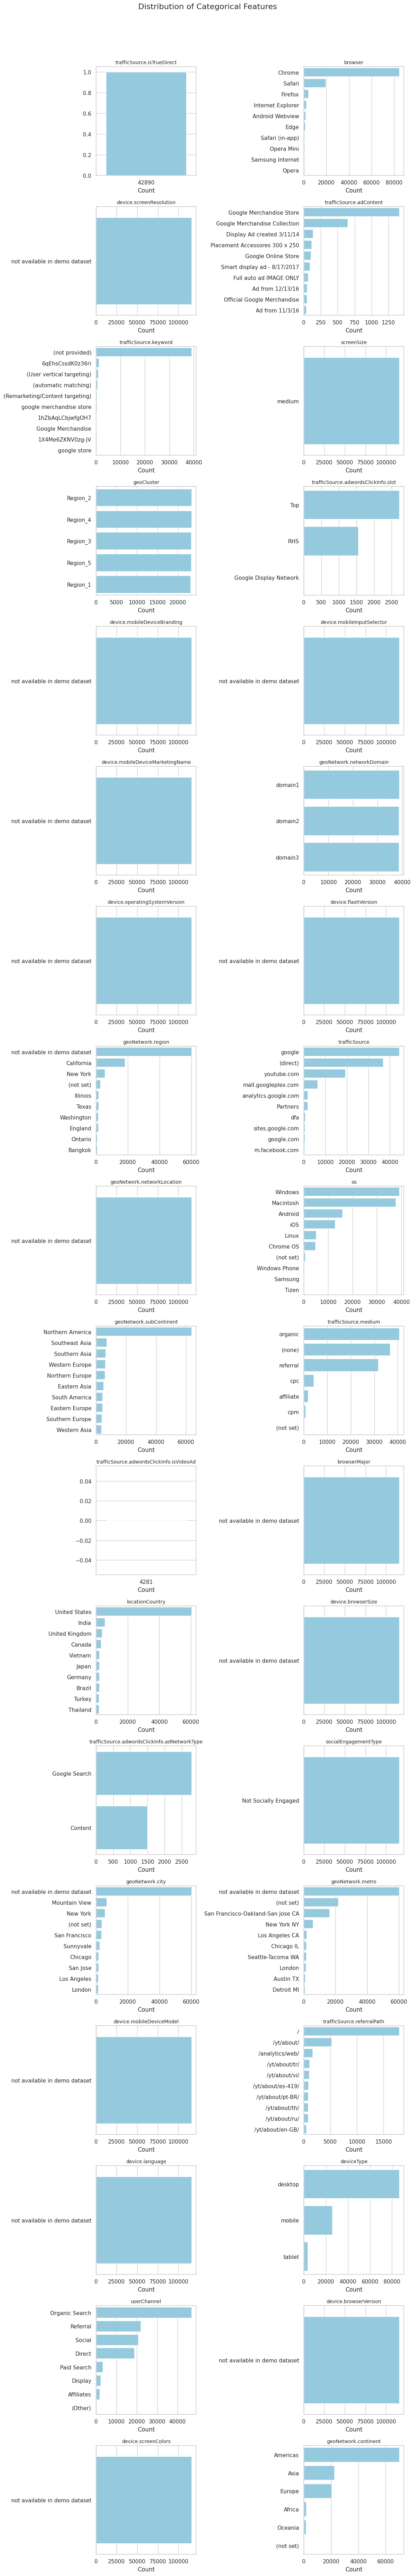

In [ ]:
# Bar-plot of all categorical features

def plot_categorical_counts(df, cat_cols, top_n=10, cols=2):
    rows = math.ceil(len(cat_cols) / cols)  # Calculate rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))  # Adjust size
    axes = axes.flatten()  # Flatten in case of single row/col

    for i, col in enumerate(cat_cols):
        top_categories = df[col].value_counts().nlargest(top_n)
        sns.barplot(x=top_categories.values, y=top_categories.index, color='skyblue', ax=axes[i])
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel('')

    # Remove empty subplots if cat_cols doesn’t perfectly fill grid
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
    plt.show()

cat_cols= train_df.select_dtypes('object').columns
cat_cols=cat_cols.drop(['trafficSource.campaign'])
plot_categorical_counts(train_df,cat_cols)

**Key Observations:**
* There are **16 columns** that feature only `not available in demo dataset` value, meaning these columns are constant.
* **geoCluster, geoNetwork.networkDomain** feature balanced distribution of categories.

## Data Analysis

In [ ]:
# This function helps to analyse all columns and return suggestions such as:

# Group few categories in high cardinality columns,
# drop constant/near constant columns,
# find columns that have high correlation with target column,

def analyze_features(df, target_col='purchaseValue', rare_thresh=0.01, corr_thresh=0.9):
    suggestions={'drop':[], 'group_rare':[], 'keep':[], 'notes':{}}

    numerical_cols=df.select_dtypes(include=['int32', 'int64', 'float64']).columns.drop(target_col, errors='ignore')
    categorical_cols=df.select_dtypes(include='object').columns

    for col in numerical_cols:

        corr=df[[col, target_col]].corr().iloc[0, 1]
        unique_vals=df[col].nunique()

        if df[col].std()==0 or unique_vals==1:
            suggestions['drop'].append(col)
            suggestions['notes'][col]="Constant/near-constant column"

        elif abs(corr)>corr_thresh:
            suggestions['notes'][col]=f"High correlation with target ({corr:.2f})"

        else:
            suggestions['keep'].append(col)

    for col in categorical_cols:

        unique_vals=df[col].nunique()
        freq=df[col].value_counts(normalize=True)
        top_val_pct=freq.iloc[0]
        mean_target_by_cat=df.groupby(col)[target_col].mean()
        max_min_diff=mean_target_by_cat.max()-mean_target_by_cat.min()

        if (freq<rare_thresh).sum()>0:
            suggestions['group_rare'].append(col)
            suggestions['notes'][col]=f"{(freq < rare_thresh).sum()} rare categories (<{rare_thresh*100:.1f}% threshold)"

        if max_min_diff<df[target_col].std()*0.1:
            suggestions['drop'].append(col)
            suggestions['notes'][col]="Weak target separation across categories"

        else:
            suggestions['keep'].append(col)

    return suggestions

This function analyzes each feature in the dataset with respect to the target column.

**This function provides the following suggestions:**
* Features to drop
* Features to keep
* Categorical features where rare categories need grouping
  
**1. Numerical Feature Analysis**
   * **Costant or low variance check:** Checks for 0 standard deviation or one unique value columns.
   * **Correlation check:** Checks for high correlation features.

**2. Categorical Feature Analysis**
   * **Rare category detection:** If any categories have frequency less than 1%, they are grouped into rare categories.
   * **Target separation check:** Checks if the average target value for each category doesn't differ much. Otherwise, it suggests to drop the column.

In [ ]:
suggestions=analyze_features(train_df, target_col='purchaseValue')

print("Drop:", suggestions['drop'])
print("\nGroup Rare Categories:", suggestions['group_rare'])
print("\nKeep:", suggestions['keep'])
print("\nNotes:")

for k, v in suggestions['notes'].items():
    print(f"-{k}: {v}")

Drop: ['totals.visits', 'locationZone', 'totals.bounces', 'new_visits', 'trafficSource.isTrueDirect', 'device.screenResolution', 'screenSize', 'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']

Group Rare Categories: ['browser', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign', 'geoNetwork.region', 'trafficSource', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'locationCountry', 'geoNetwork.city', 'geoNetwork.metro', 'trafficSource.referralPath', 'userChannel', 'geoNetwork.continent']

Keep: ['userId', 'gclIdPresent', 'sessionNumber', 'sess

# **Data Cleaning/Preprocessing**

In [ ]:
target='purchaseValue'
X=train_df.drop(columns=[target])
y=train_df[target]

In [ ]:
# drop_cols was derived from the analyze_features function

drop_cols=['totals.visits', 'locationZone', 'totals.bounces', 'new_visits',
             'trafficSource.isTrueDirect', 'device.screenResolution', 'screenSize',
             'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector',
             'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
             'device.operatingSystemVersion', 'device.flashVersion',
             'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd',
             'browserMajor', 'device.browserSize', 'socialEngagementType',
             'device.mobileDeviceModel', 'device.language', 'device.browserVersion',
             'device.screenColors']

X.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [ ]:
# Function to group rare categories in categorical columns

def group_rare(series, threshold=0.01):
    freq=series.value_counts(normalize=True)
    rare=freq[freq<threshold].index
    return series.where(~series.isin(rare), other='Other')

In [ ]:
# rare_cols was derived from the analyze_features function

rare_cols=['browser', 'trafficSource.adContent', 'trafficSource.keyword',
             'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
             'geoNetwork.region', 'trafficSource', 'os', 'geoNetwork.subContinent',
             'trafficSource.medium', 'locationCountry', 'geoNetwork.city',
             'geoNetwork.metro', 'trafficSource.referralPath', 'userChannel',
             'geoNetwork.continent']

for col in rare_cols:
    X[col]=group_rare(X[col])
    test_df[col]=group_rare(test_df[col])

## Feature Engineering

In [ ]:
# Feature_engineering function

def feature_engineering(df):
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date']=pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')

    if not np.issubdtype(df['sessionStart'].dtype, np.datetime64):
        df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s', utc=True, errors='coerce')


    df['day_of_week']=df['date'].dt.dayofweek
    df['month']=df['date'].dt.month
    df['is_weekend']=df['day_of_week'].isin([5, 6]).astype(int)
    df['hour_of_day']=df['sessionStart'].dt.hour

    session_count=train_df.groupby('userId')['sessionId'].nunique()
    df['user_session_count']=df['userId'].map(session_count)

    df['is_returning_user']=(df['user_session_count']>1).astype(int)
    return df

X=feature_engineering(X)
test_df=feature_engineering(test_df)

**New Features Description:**
* **day_of_week**: This feature returns the day of week as number, i.e. 0->Monday.
* **month**: This feature returns the month as number, i.e. 1->January.
* **is_weekend**: A boolean feature that returns 1 if day_of_week equals 5 or 6, i.e. Saturday or Sunday.
* **hour_of_day**: Returns integer ranging between 0 and 23.
* **user_session_count**: Returns integer that is amount of times a given user had session on the website.
* **is_returning_user**: A boolean feature that returns 1 if a user is returning to the website.

# **Splitting Train Dataset**

In [ ]:
num_cols=X.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist() # numerical columns
cat_cols=X.select_dtypes(include='object').columns # categorical columns

In [ ]:
[col for col in cat_cols if X[col].nunique()>=9] # High cardinality columns fo target encoding

['trafficSource.adContent',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'locationCountry',
 'geoNetwork.city',
 'geoNetwork.metro',
 'trafficSource.referralPath']

In [ ]:
# this list has been created with many trial-and-error ways and mostly consists of high cardinality columns.
# For, instance, 'trafficSource.campaign' doesn't have very high unique values but helped in improving r2_score of model.

target_encode_cols=['geoNetwork.city', 'trafficSource.keyword', 'trafficSource.campaign',
                'geoNetwork.subContinent', 'locationCountry', 'trafficSource.referralPath']

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=39) # splitting dataset into train and test sets

In [ ]:
cat_cols=cat_cols.difference(target_encode_cols).tolist() # removes target_encode_cols values from cat_cols

# **Preprocessing Pipeline**

In [ ]:
preprocessor=ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), cat_cols),
    ('target_enc', TargetEncoder(smoothing=5), target_encode_cols)
])

**1. Numerical Columns:**
* **[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)(strategy='most_frequent'):**
  * Imputes missing values with the most frequent (mode) value in each numerical column.
  * Usually, mean is preferred for numerical columns, but most frequent is used here because it gave a better r2_score.
* **[StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):**
  * Standardizes features by removing the mean and scaling to unit variance.
  * Output: zero-mean and unit-variance scaled numerical data.
  * Formula: $$[z = \frac{x - \mu}{\sigma}]$$
$$( x ): original\ feature\ value$$
$$( \mu ): mean\ of\ the\ feature$$
$$( \sigma ): standard\ deviation\ of\ the\ feature$$
$$( z ): standardized\ value$$

**2. Categorical Columns:**
* **[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)(strategy='most_frequent'):**
  * Fills missing values in categorical columns with the most frequent category.
* **[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)(handle_unknown='use_encoded_value', unknown_value=-1):**
  * Converts each category into a unique integer.
  * If an unseen category appears during inference, it is encoded as -1.

**3. Target Encoded Columns:**
* **[TargetEncoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)(smoothing=5):**
  * Applies target encoding, i.e., replaces each category with the mean target value for that category.
  * Smoothing helps avoid overfitting by blending category means with the global mean.
  * Useful for high-cardinality categorical features.

# **Model Building**

## [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (Baseline Model)

A statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
* **Formula (Multiple Linear Regression):**
$$[Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + {\epsilon}]$$

$$( Y ): dependent\ variable$$
$$( \beta_0 ): Y\ intercept$$
$$( \beta_1 ... \beta_n ): slope\ coefficient$$
$$( X_1 ... X_n ): independent\ variable$$
$$( {\epsilon} ): error\ term$$
* **Advantage:** A good baseline model for regression\ tasks.
* **Disadvantage:** Assumes linearity between features and target, which often doesn't hold in real world data.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.adContent',
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'trafficSource.adwordsClickInfo.slot',
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model', LinearRegression())])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: 0.11639075325899284


## [Ridge Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

A linear model with L2 regularization to reduce overfitting and handle multicollinearity.
* **Formula:**
$$[J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \theta_j^2]$$

$$( \lambda ): regularization\ strength$$
$$(\theta_j): model\ coefficients $$
* **Advantage:** Improves generalization over plain Linear Regression.
* **Disadvantage:** Still cannot capture non-linear patterns.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.adContent',
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'trafficSource.adwordsClickInfo.slot',
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model', Ridge(random_state=42))])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: 0.11639184893456911


## [SGD Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

**Stochastic Gradient Descent** is a variation of Gradient Descent algorithm where model parameters are updated using gradient of loss function with respect to a single training example of each iteration.
* **Formula:**
$$[\theta := \theta - \eta \cdot \nabla_\theta J(\theta)]$$
$$( \theta): model\ parameters  $$
$$( \eta): learning\ rate  $$
$$( J(\theta)): loss\ function\ (e.g., MSE)$$
* **Advantage:** Faster and scalable for large datasets compared to batch solvers in Ridge.
* **Disadvantage:** Sensitive to feature scaling, learning rate, and other hyperparameters.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'trafficSource.adwordsClickInfo.slot',
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model', SGDRegressor(random_state=42))])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: -1.2648534407828624e+30


## [Hist Gradient Boosting Model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

Tree-based ensemble using histogram binning for faster gradient boosting.
* **Formula:**
$$[\min \sum_{i=1}^n L(y_i, \hat{y}_i) + \Omega(f)]$$
$$( \Omega(f)): regularization\ term$$
* **Advantage:** Captures non-linearities and handles large data efficiently compared to linear models.
* **Disadvantage:** Less interpretable and slower to train than linear models. Hence, the model can overfit if not tuned well.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingRegressor(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'trafficSource.adwordsClickInfo.slot',
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model', HistGradientBoostingRegressor(random_state=42))])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: 0.3179357374724108


## [LightGBM Model](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)

A gradient boosting framework that grows trees leaf-wise with histogram optimization. Its a framework developed by Microsoft.
* **Objective Function:**
$$[\text{Objective: } \min \sum_{i=1}^n L(y_i, \hat{y}_i) + \Omega(f)]$$

$$( \Omega(f)): regularization\ term$$
* **Advantage:**: Faster and more memory-efficient than HistGB with support for categorical features.
* **Disadvantage:** May overfit on small datasets or when too many leaf-wise splits are made.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 31
[LightGBM] [Info] Start training from score 26616911.364778


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'trafficSource.adwordsClickInfo.slot',
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model', LGBMRegressor(random_state=42))])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: 0.44550389340893937


## [XGBoost Model](https://xgboost.readthedocs.io/en/stable/parameter.html)

**eXtreme Gradient Boosting** is an optimized gradient boosting library with regularization and parallel computation.
* **Objective Function:**
$$[\mathcal{L} = \sum_{i=1}^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k)]$$
$$[\Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2]$$
$$( T ): number\ of\ leaves$$
$$( w ): leaf\ weights$$
$$( \gamma, \lambda ): regularization\ parameters$$
* **Advantage:** Often provides slightly better accuracy and robustness than LightGBM, especially on sparse or noisy data.
* **Disadvantage:** Higher training time and memory usage compared to LightGBM, especially with large feature sets.

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred=pipeline.predict(X_val)
print("Validation R2 Score:", r2_score(y_val, y_pred))

Validation R2 Score: 0.38129583105905995


**Conclusion:**

**`HistGradientBoostingRegressor`**, **`LightGBMRegressor`**, and **`XGBoostRegressor`** performed better among all the models trained above. Hence, these models will go through hyperparameter tuning to improve their performance.

# **Hyperparameter Tuning**

I used **[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)** for hyperparameter optimization. This is mainly due to its:
* High efficiency in exploring a wide range of hyperparameter combinations
* Significantly lower computational cost (resource and time) compared to **[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**.

**Note:** Hyperparameter tuning was conducted on the full dataset (X, y) i.e. train_data.csv instead of the training subset (X_train, y_train) to maximize model learning and performance. Although this may risk mild information leakage, this approach led to higher scores on the public leaderboard, indicating better generalization to the hidden test set.

## Hist Gradient Boosting Hyperparameter Tuning

In [ ]:
'''pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
])

pipeline.fit(X_train, y_train)
X_train_processed=pipeline.transform(X)
X_val_processed=pipeline.transform(X_val)

hgb_model=HistGradientBoostingRegressor(random_state=42)

param_distributions={
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_iter': [100, 200, 300, 500],
    'max_depth': [None, 5, 7, 10],
    'min_samples_leaf': [10, 20, 50, 100],
    'l2_regularization': [0.0, 0.001, 0.01, 0.1, 1.0],
    'max_bins': [128, 256, 512],
    #'scoring': ['loss', 'poisson', 'quantile']
}
random_search_hgb=RandomizedSearchCV(
    estimator=hgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV for HistGradientBoosting Regressor...")
random_search_hgb.fit(X_train_processed, y_train)'''
''''''

''

**Hyperparameters Used:**

* `learning_rate`: Step size for each boosting iteration
* `max_iter`: Total number of boosting iterations
* `max_depth`: Maximum depth of individual trees
* `min_samples_leaf`: Minimum samples required per leaf
* `l2_regularization`: Strength of L2 weight penalty
* `max_bins`: Number of bins for histogram splits

In [ ]:
'''print("HistGradientBoosting Hyperparameter Tuning Results:")
print(f"Best R2 Score found (from cross-validation): {random_search_hgb.best_score_:.4f}")
print(f"Best parameters found: {random_search_hgb.best_params_}")

best_hgb_model=random_search_hgb.best_estimator_
y_pred_tuned_hgb=best_hgb_model.predict(X_val_processed)
r2_tuned_hgb=r2_score(y_val, y_pred_tuned_hgb)
print(f"R2 Score on validation set with best parameters: {r2_tuned_hgb:.4f}")'''

'''HistGradientBoosting Hyperparameter Tuning Results:
Best R2 Score found (from cross-validation): 0.3529
Best parameters found: {'min_samples_leaf': 10, 'max_iter': 500, 'max_depth': 10, 'max_bins': 128, 'learning_rate': 0.2, 'l2_regularization': 0.0}
R2 Score on validation set with best parameters: 0.5159'''
''''''

''

**Results:**
* **Best R2 Score found (from cross-validation):** 0.3529
* **Best parameters found:** {'min_samples_leaf': 10, 'max_iter': 500, 'max_depth': 10, 'max_bins': 128, 'learning_rate': 0.2, 'l2_regularization': 0.0}
* **R2 Score on validation set with best parameters:** 0.5159

## LightGBM Hyperparameter Tuning

In [ ]:
'''pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
])
pipeline.fit(X_train, y_train)
X_train_processed=pipeline.transform(X_train)
X_val_processed=pipeline.transform(X_val)

lgbm_model=LGBMRegressor(random_state=39, verbosity=-1)

param_distributions_lgbm={
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [-1, 3, 5, 7, 9, 11],
    'num_leaves': [15, 31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1],
    'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1]
}

random_search_lgbm=RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_distributions_lgbm,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV for LGBMRegressor...")
random_search_lgbm.fit(X_train_processed, y_train)'''
''''''

''

**Hyperparameters Used:**
* `n_estimators`: Number of boosting rounds
* `learning_rate`: Shrinks contribution of each tree
* `max_depth`: Maximum tree depth
* `num_leaves`: Number of leaves per tree
* `subsample`: Row sampling ratio per tree
* `colsample_bytree`: Feature sampling ratio per tree
* `reg_alpha`: L1 regularization strength
* `reg_lambda`: L2 regularization strength

In [ ]:
'''print("LightGBM Hyperparameter Tuning Results:")
print(f"Best R2 Score found (from cross-validation): {random_search_lgbm.best_score_:.4f}")
print(f"Best parameters found: {random_search_lgbm.best_params_}")
best_lgbm_model=random_search_lgbm.best_estimator_
y_pred_tuned_lgbm=best_lgbm_model.predict(X_val_processed)
r2_tuned_lgbm=r2_score(y_val, y_pred_tuned_lgbm)
print(f"R2 Score on validation set with best parameters: {r2_tuned_lgbm:.4f}")'''

'''LightGBM Hyperparameter Tuning Results:
Best R2 Score found (from cross-validation): 0.1773
Best parameters found: {'subsample': 0.8, 'reg_lambda': 0.05, 'reg_alpha': 0, 'num_leaves': 127, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
R2 Score on validation set with best parameters: 0.2968'''

'''LightGBM Hyperparameter Tuning Results:
Best R2 Score found (from cross-validation): 0.4294
Best parameters found: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.05, 'num_leaves': 127, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
R2 Score on validation set with best parameters: 0.8697'''
''''''

''

**Results:**
* **Best R2 Score found (from cross-validation):** 0.4294
* **Best parameters found:** {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.05, 'num_leaves': 127, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
* **R2 Score on validation set with best parameters:** 0.8697

## XGBoost Hyperparameter Tuning

In [ ]:
'''pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
])

pipeline.fit(X,y)
X_processed=pipeline.transform(X)
X_val_processed=pipeline.transform(X_val)
xgb_model=XGBRegressor(random_state=39)

param_distributions={
    'n_estimators': [500, 700, 1000],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [7, 9, 11],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0.001, 0.005, 0.01]
}

random_search_xgb=RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV for XGBoost Regressor...")
random_search_xgb.fit(X_processed, y)'''
''''''

''

**Hyperparameters Used:**
* `n_estimators`: Number of trees to build
* `learning_rate`: Controls impact of each tree
* `max_depth`: Maximum tree depth for base learners
* `subsample`: Fraction of rows to sample
* `colsample_bytree`: Fraction of features to sample
* `gamma`: Minimum loss reduction for split
* `reg_alpha`: L1 penalty term on weights

In [ ]:
'''print("XGBoost Hyperparameter Tuning Results:")
print(f"Best R2 Score found (from cross-validation): {random_search_xgb.best_score_:.4f}")
print(f"Best parameters found: {random_search_xgb.best_params_}")
best_xgb_model=random_search_xgb.best_estimator_
y_pred_tuned_xgb=best_xgb_model.predict(X_val_processed)
r2_tuned_xgb=r2_score(y_val, y_pred_tuned_xgb)
print(f"R2 Score on validation set with best parameters: {r2_tuned_xgb:.4f}")
'''


'''XGBoost Hyperparameter Tuning Results:
Best R2 Score found (from cross-validation): 0.4368
Best parameters found: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 1000, 'reg_alpha': 0.005, 'subsample': 1.0}
R2 Score on validation set with best parameters: 1.0000'''
''''''

''

**Results:**
* **Best R2 Score found (from cross-validation):** 0.4368
* **Best parameters found:** {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 1000, 'reg_alpha': 0.005, 'subsample': 1.0}
* **R2 Score on validation set with best parameters:** 1.0000

# **Optimized Models**

## Optimized Hist Gradient Boost Model

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingRegressor(min_samples_leaf=10,
                                            max_iter=500,
                                            max_depth=10,
                                            max_bins=128,
                                            learning_rate=0.2,
                                            l2_regularization=0.0,
                                            random_state=39
    ))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model',
                 HistGradientBoostingRegressor(learning_rate=0.2, max_bins=128,
                                               max_depth=10, max_iter=500,
                                               min_samples_leaf=10,
                                               random_state=39))])

In [ ]:
y_pred=pipeline.predict(X_val)
r2_hgb=r2_score(y_val, y_pred)
print("Validation R2 Score:", r2_hgb)

Validation R2 Score: 0.3094323234503502


## Optimized LightGBM Model

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(subsample=0.6,
                            reg_lambda=0,
                            reg_alpha=0.05,
                            num_leaves=127,
                            n_estimators=200,
                            max_depth=-1,
                            learning_rate=0.15,
                            colsample_bytree=1.0,
                            random_state=39
    ))
])

In [ ]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 31
[LightGBM] [Info] Start training from score 26616911.364778


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                                                   'trafficSource.medium',
                                                   'userChannel']),
                                                 ('target_enc',
                                                  TargetEncoder(smoothing=5),
                                                  ['geoNetwork.city',
                                                   'trafficSource.keyword',
                                                   'trafficSource.campaign',
                                                   'geoNetwork.subContinent',
                                                   'locationCountry',
                                                   'trafficSource.referralPath'])])),
                ('model',
                 LGBMRegressor(learning_rate=0.15, n_estimators=200,
                               num_leaves=127, random_state=39, reg_alpha=0.05,
                               reg_lambda=0, subsample=0.6))])

In [ ]:
y_pred=pipeline.predict(X_val)
r2_lgb=r2_score(y_val, y_pred)
print("Validation R2 Score:", r2_lgb)

Validation R2 Score: 0.5603551971194082


## Optimized XGBoost Model

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(subsample=1.0,
                           reg_alpha=0.005,
                           n_estimators=1000,
                           max_depth=11,
                           learning_rate=0.2,
                           gamma=0.1,
                           colsample_bytree= 0.6,
                           random_state=39
    ))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=11, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=39, ...))])

In [ ]:
y_pred=pipeline.predict(X_val)
r2_xgb=r2_score(y_val, y_pred)
print("Validation R2 Score:", r2_xgb)

Validation R2 Score: 0.6221895376775064


### Plotting Optimized Models Graph

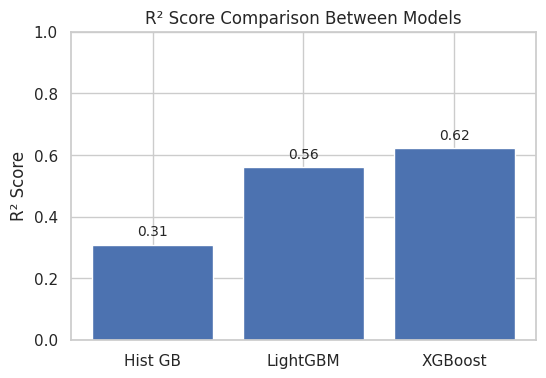

In [ ]:
model_names = ['Hist GB', 'LightGBM', 'XGBoost']
r2_scores = [r2_hgb, r2_lgb, r2_xgb]

# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(model_names, r2_scores)
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.ylabel('R² Score')
plt.title('R² Score Comparison Between Models')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

**Key Observation:**
* Finally, We can conclude that **XGBoostRegressor** performs better compared to other models.

# **Best Model (XGBoostRegressor)**

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(subsample=1.0,
                           reg_alpha=0.005,
                           n_estimators=1000,
                           max_depth=11,
                           learning_rate=0.2,
                           gamma=0.1,
                           colsample_bytree= 0.6,
    ))
])

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['userId', 'gclIdPresent',
                                                   'sessionNumber', 'sessionId',
                                                   'trafficSource.adwordsClickInfo.page',
                                                   'pageViews', 'totalHits',
                                                   'day_of_week', 'month',
                                                   'is_weekend', 'hour_of_day',
                                                   'user_session_cou...
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=11, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

**Trained XGBoost Model on entire dataset.**

# **Test Dataset Prediction**

In [ ]:
y_test_pred=pipeline.predict(test_df)
y_test_pred

array([33687068.   , 12125874.   ,  1455199.1  , ..., 43916820.   ,
         -46561.652,  -470724.34 ], dtype=float32)

In [ ]:
y_test_pred=np.clip(y_test_pred, 0, None)
y_test_pred

array([33687068. , 12125874. ,  1455199.1, ..., 43916820. ,        0. ,
              0. ], dtype=float32)

**I've clipped the negative prediction values to 0 since `purchaseValue` can't be negative.**

# **Submission**

In [ ]:
submission=pd.DataFrame({'id':range(0,test_df.shape[0]),
                        'purchaseValue': y_test_pred})
submission

,id,purchaseValue
0,0,3.368707e+07
1,1,1.212587e+07
2,2,1.455199e+06
3,3,1.100430e+07
4,4,0.000000e+00
...,...,...
29001,29001,1.328828e+06
29002,29002,1.437982e+08
29003,29003,4.391682e+07
29004,29004,0.000000e+00


In [ ]:
submission.to_csv('submission.csv',index=False)